<a href="https://colab.research.google.com/github/kaiosborne/ML-Mini-Project/blob/main/notebooks/ATLAS%20Cut%20Based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. $H\rightarrow b\bar{b}$ via Sequential Cuts

To provide a simple baseline analysis, which can be used to compare a multivariate based analysis to, a set of selection cuts on the kinematic and topological paramaters first needs to be optimised. The goal is to apply cuts that maximise the _signal sensitivity_. Cuts should be applied on all variables other than $m_{bb}$, as the $m_{bb}$ distribution is used to evalute the _signal sensitivity_, which is calculated on a bin-by-bin basis from a given distribution ($m_{bb}$ is the most sensitive single variable, so in the absence of a multivariate approach, it is the best single variable to use to distinguish signal from background).

# 2.1 Optimising Cuts

The code below provides an example of how to use the ATLAS simulated data (which contains the signal and all the relevent background processes) to determine a selection of cuts on the kinematic and topoligical parameters to provide an optimal selection to maximise the _signal sensitivity_.

The plot_variable() function can be used to visualise how a particular kinematic or topological event variable is distributed for the various process involved. The code below plots the distributions of a few variables, with the signal (labelled $VH \rightarrow bb$ in the legend) shown in solid red and the other backgrounds shown as filled histograms of various colours, stacked on top of each other. For clarity a red solid line has also been plotted to help identify the shape of the sigal.

In [1]:
# Download the data files if we need them. If you download the repo as a ZIP,
# this cell is not needed. If running on colab, it will automatically download
# all required data.

from pathlib import Path


data_path = Path('../data-v2/VHbb_data_2jet.csv')
class_path = Path('ucl_masterclass.py')
if not data_path.exists():
    !wget -P ../data-v2/ https://raw.githubusercontent.com/nikitapond/in2HEP/master/data-v2/VHbb_data_2jet.csv
else:
    print("Data file already found")

if not class_path.exists():
    !wget https://raw.githubusercontent.com/nikitapond/in2HEP/master/notebooks/ucl_masterclass.py
else:
    print("Required custom classes already found")

plt.rcParams["figure.figsize"] = (6, 4)

--2025-03-15 21:35:09--  https://raw.githubusercontent.com/nikitapond/in2HEP/master/data-v2/VHbb_data_2jet.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41125108 (39M) [text/plain]
Saving to: ‘../data-v2/VHbb_data_2jet.csv’

VHbb_data_2jet.csv  100%[===================>]  39.22M   255MB/s    in 0.2s    

2025-03-15 21:35:10 (255 MB/s) - ‘../data-v2/VHbb_data_2jet.csv’ saved [41125108/41125108]

--2025-03-15 21:35:10--  https://raw.githubusercontent.com/nikitapond/in2HEP/master/notebooks/ucl_masterclass.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaitin

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from copy import deepcopy
from ucl_masterclass import *

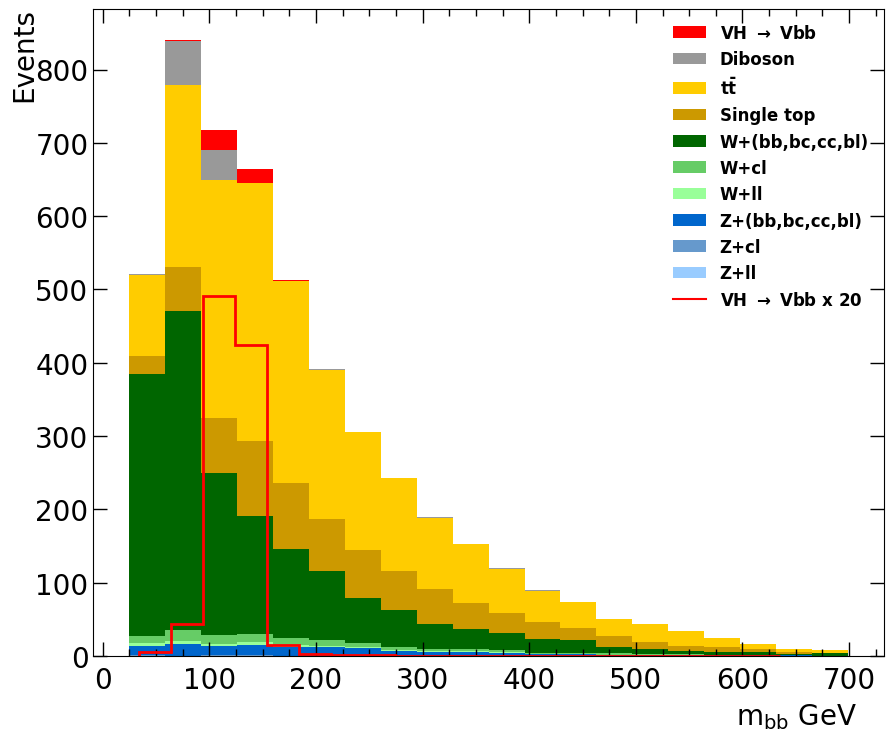

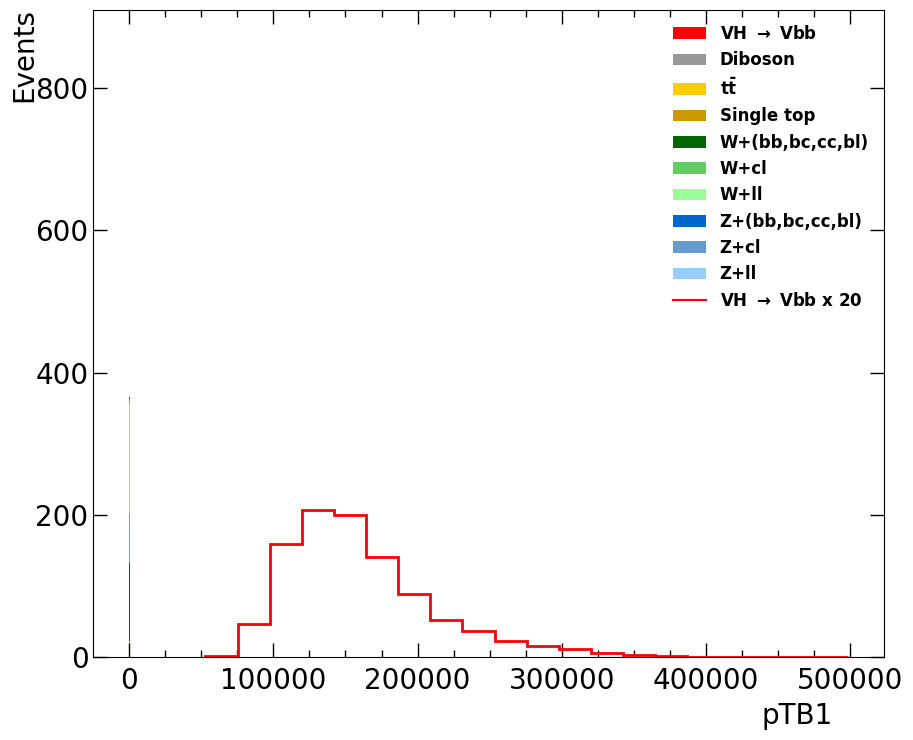

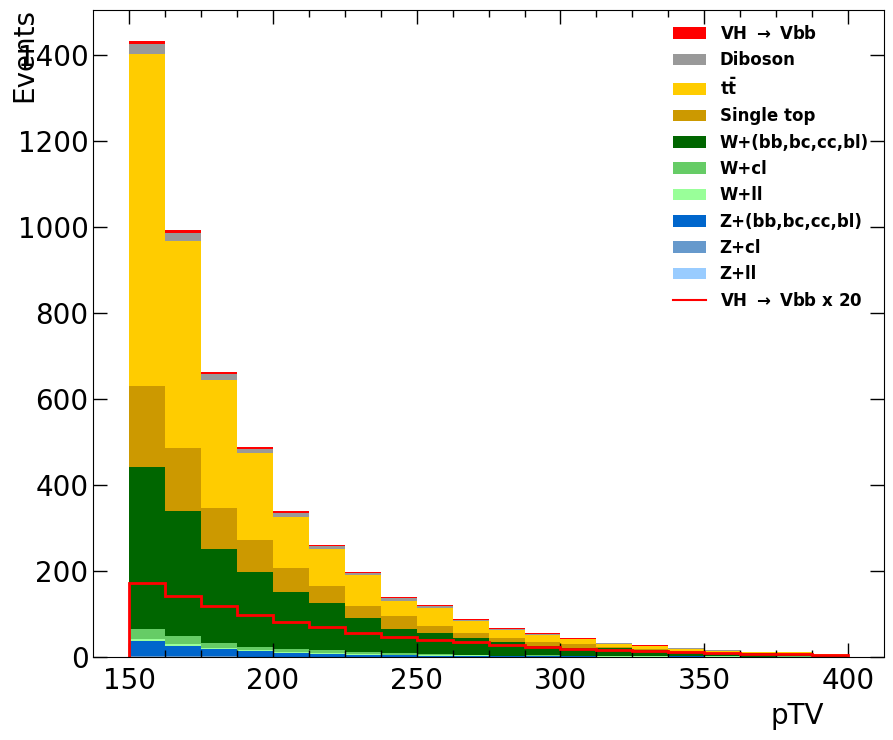

In [3]:
# Load data into a pandas data frame
df = pd.read_csv('../data-v2/VHbb_data_2jet.csv')
df_original = deepcopy(df)

# The plot_variable takes two arguments. First is the data frame used to plot the distributions and
# second is the variable in question.
plot_variable(df,'mBB') # Draw the mBB distribution
plot_variable(df,'pTB1') # Draw the pTB1 distribution
plot_variable(df,'pTV') # Draw the pTV distribution

### Cut-based selection

A suitable technique should be used to choose an optimal and simple selection of sequential cuts on the provided variables (it is not necessary to use all the variables, a subset should suffice), which provides an enhanced selection of signal relative the background. This will provide a baseline, which can be compared to the optimised NN performance later on.

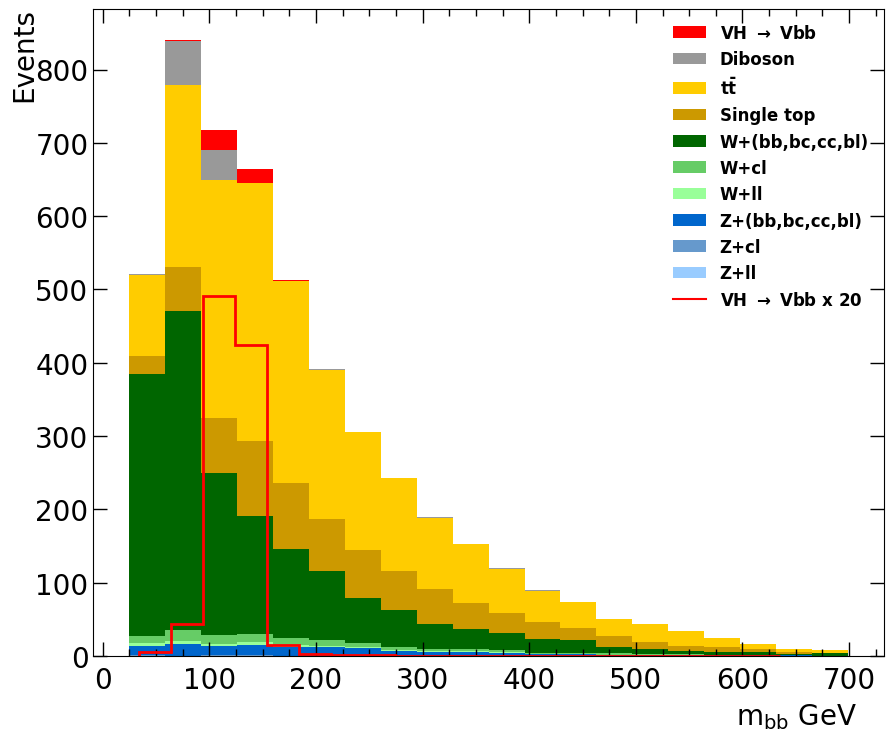

Sensitivity achieved before cuts  1.4990772856082444


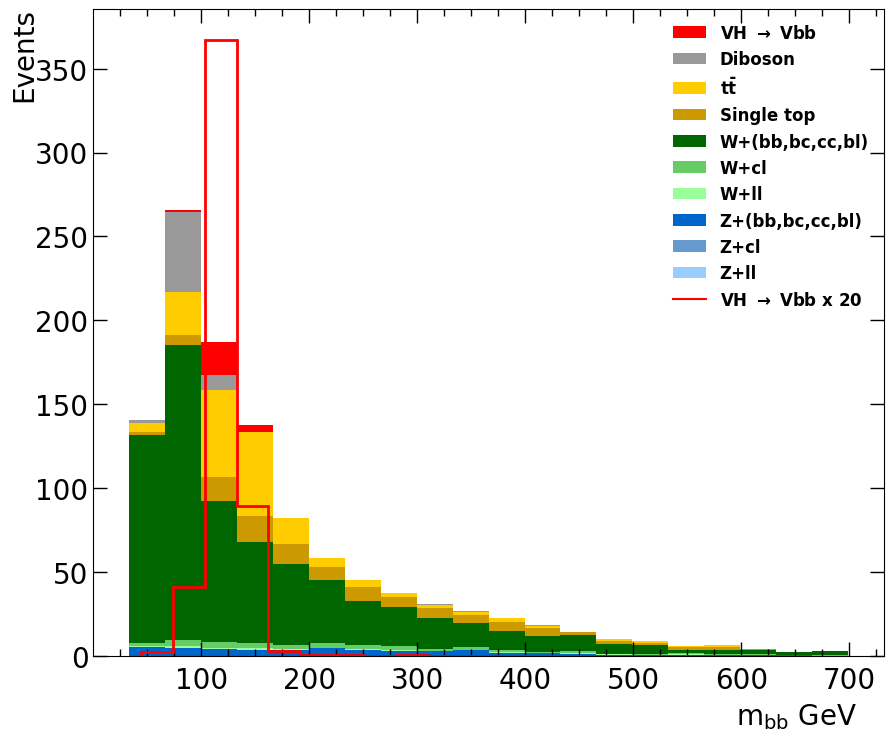

Sensitivity achieved after cuts  1.6303898529992673


In [4]:
# Apply cut
df = df.loc[df["Mtop"] / 1e3 > 250] # divide by 1e3 to convert from MeV to GeV

# The code below plots the mBB distribution before any selection is applied
plot_variable(df_original,'mBB')

# Calculate and output the sensitivity based up the original mBB distribution prior to any selection
# The sensitivity is calculated using the profile likelihood ratio test and Asimov approach
print("Sensitivity achieved before cuts ",sensitivity_cut_based(df_original))

# The code below plots the mBB distribution after the selection has applied
plot_variable(df,'mBB')

# Calculate and output the sensitivity based up the mBB distribution after the selectoin has been applied
print("Sensitivity achieved after cuts ",sensitivity_cut_based(df))

##### Multiple cuts

As well as applying cuts on a single variable, you should also attempt to apply multiple cuts one after the other. Are optimal cuts over two variables at the same point when cutting on a single variable?

**Based upon material originally produced by hackingEducation for use in outreach**  
<img src="https://github.com/nikitapond/in2HEP/blob/master/notebooks/images/logo-black.png?raw=1" width="50" align = 'left'/>

dRBB


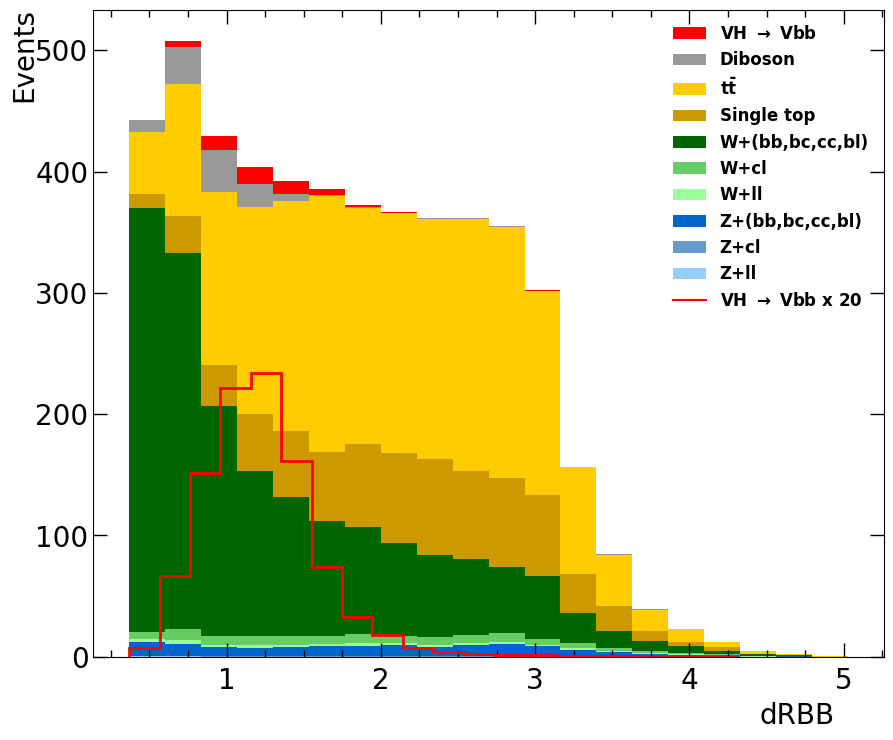

pTB1


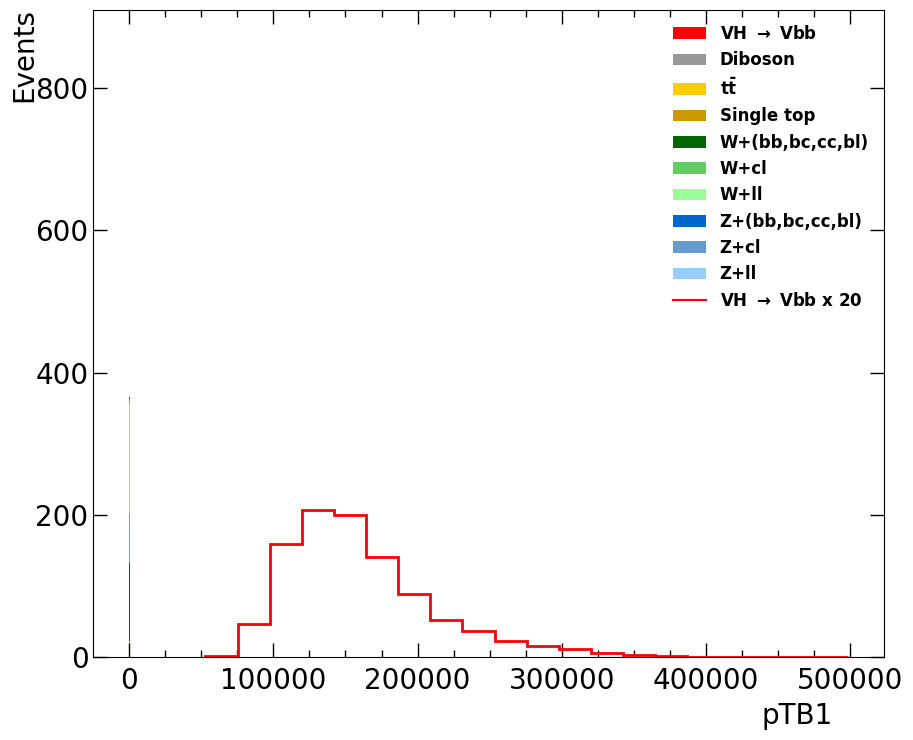

pTB2


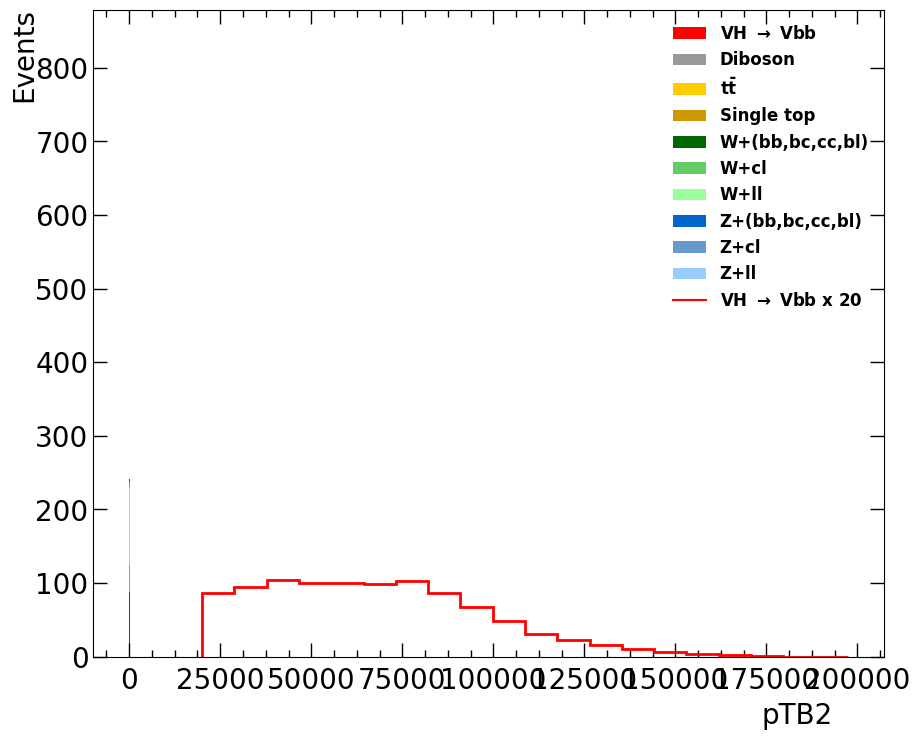

pTV


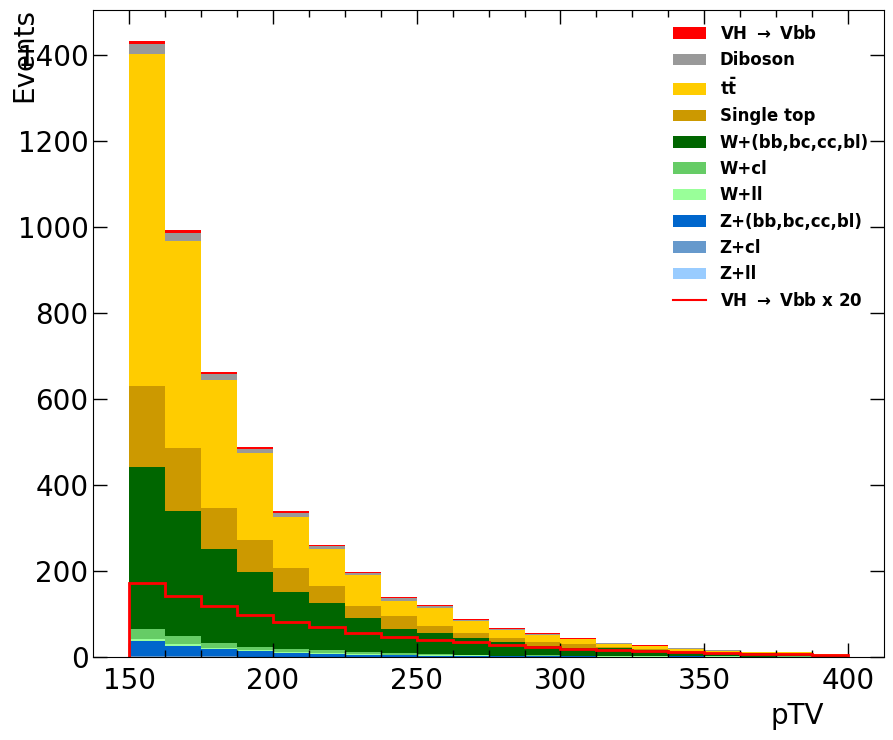

Mtop


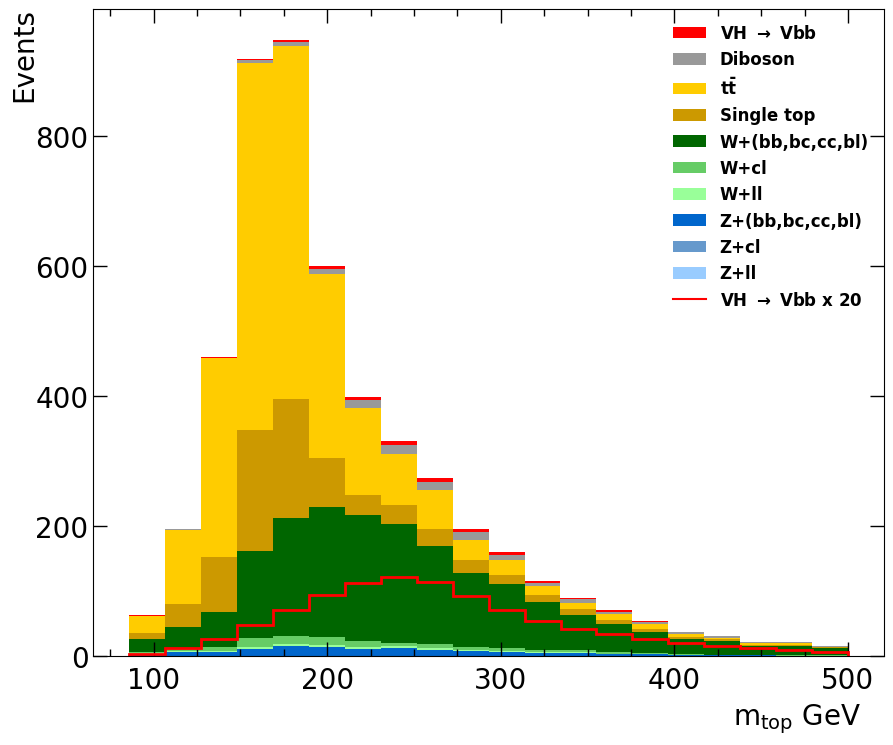

mTW


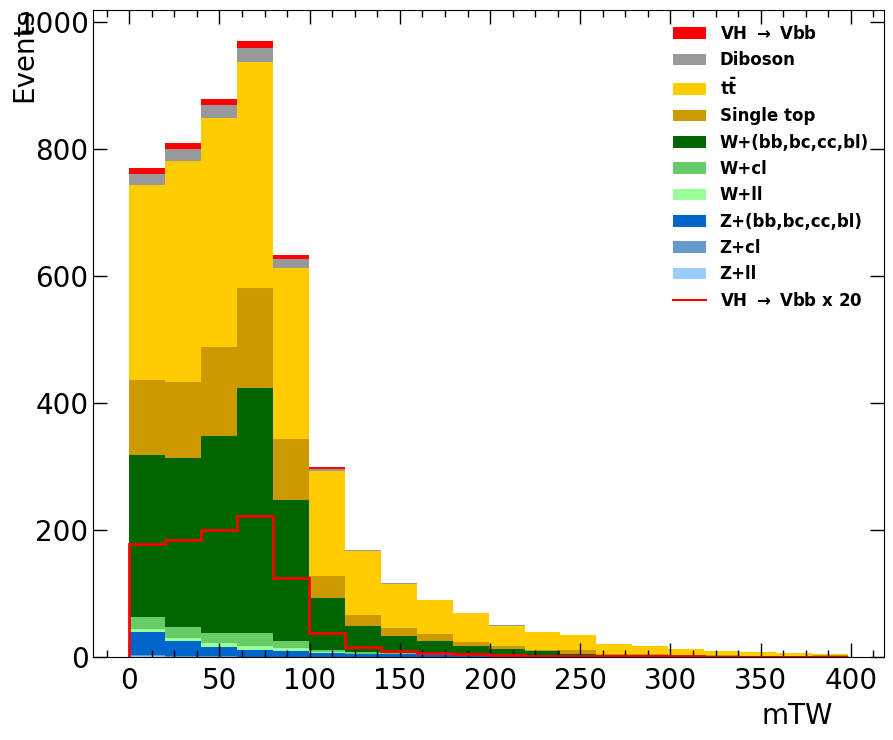

MET


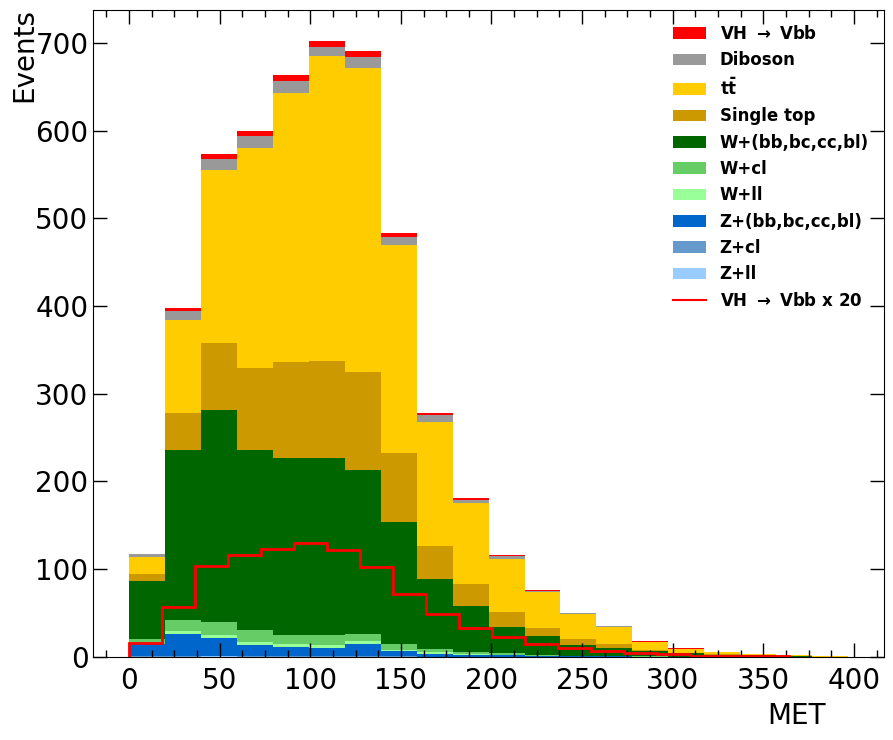

dYWH


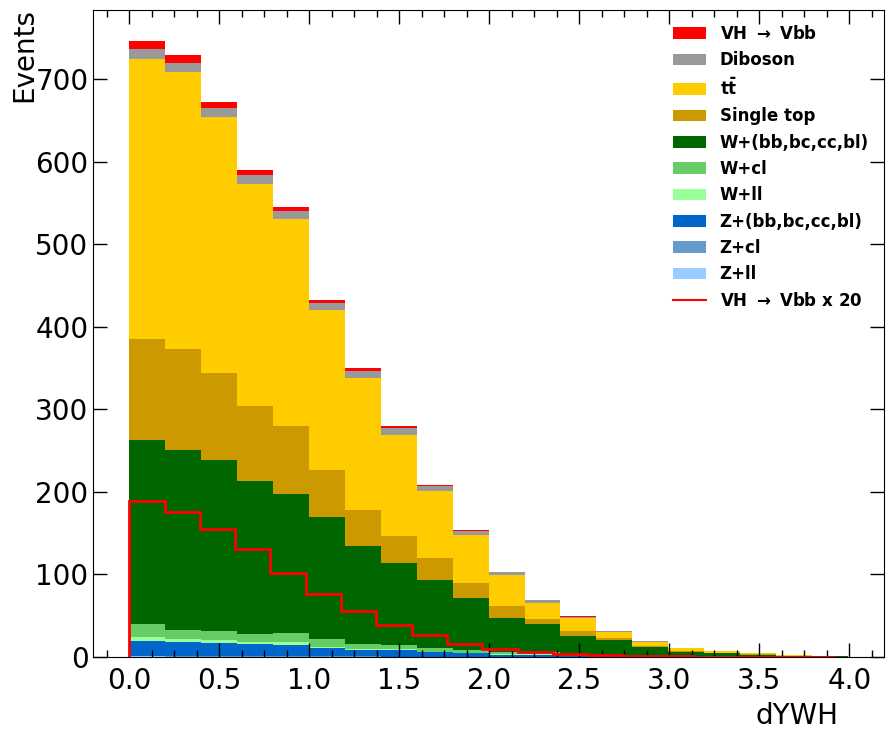

dPhiVBB


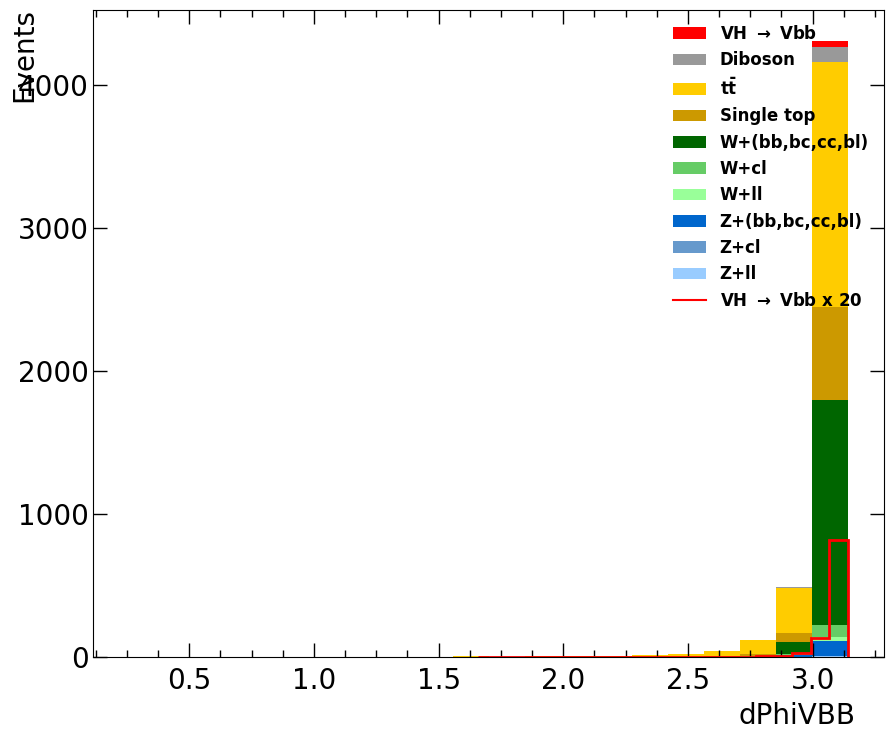

MV1cB1_cont


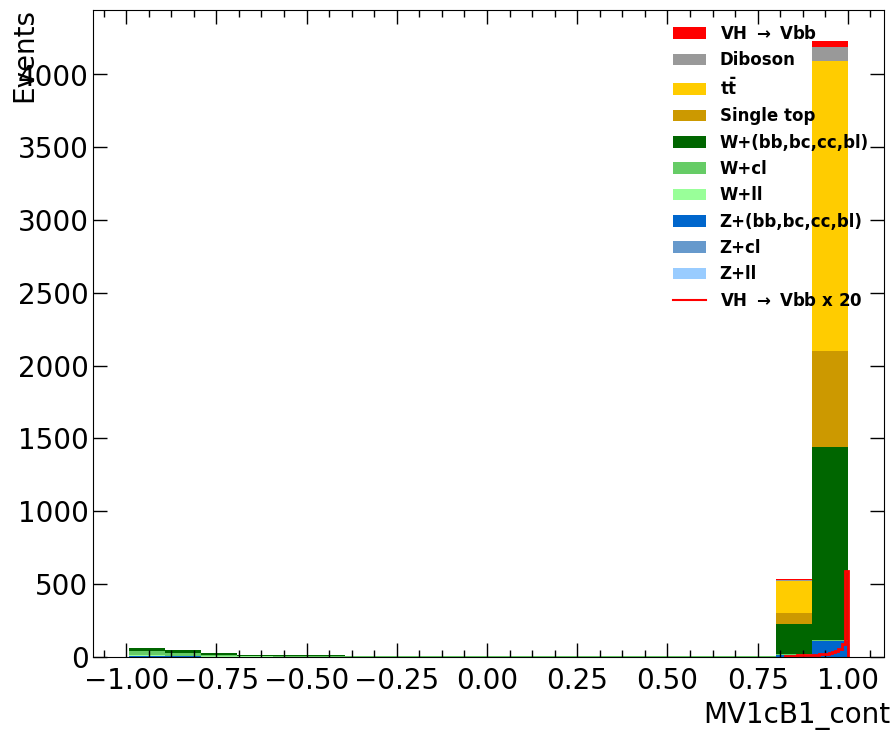

MV1cB2_cont


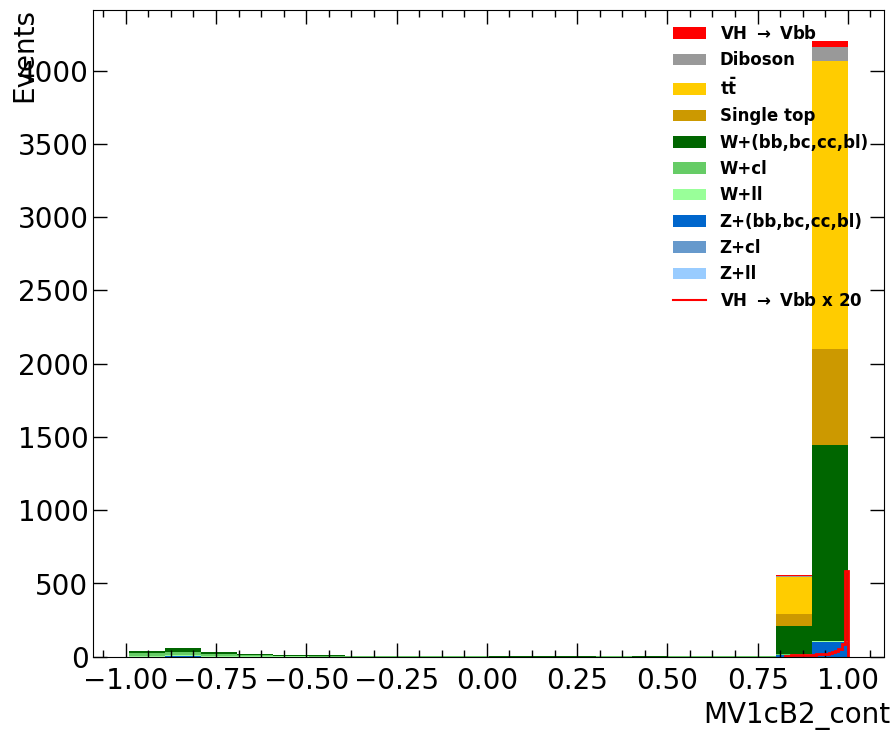

nTrackJetsOR


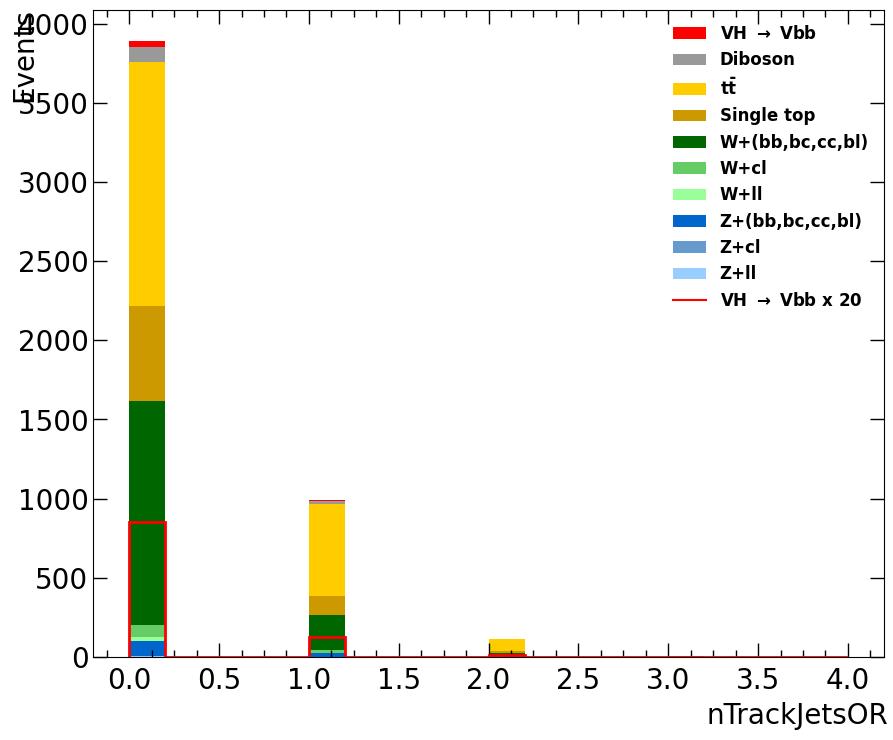

In [7]:
import pandas as pd
import numpy as np
import random
import tqdm

df = df_original


# list of variables for cuts (mBB excluded).
variables = [
    'dRBB',         # ΔR(b1,b2)
    'pTB1',         # pT of leading b-jet
    'pTB2',         # pT of sub-leading b-jet
    'pTV',          # pT of the vector boson
    'Mtop',         # Reconstructed top quark mass
    'mTW',          # Reconstructed transverse mass of the W boson
    'MET',          # Missing transverse energy
    'dYWH',         # Separation between W and Higgs candidate
    'dPhiVBB',      # Δφ(W,H) or angular separation in transverse plane
    'MV1cB1_cont',  # Classification output for leading jet
    'MV1cB2_cont',  # Classification output for sub-leading jet
    'nTrackJetsOR'  # Number of additional jets
]

for i in variables:
  plot_variable(df_original,i)

In [ ]:
#so far my thoughts are that for nTrackJetsOR, MV1cB2_cont, MV1cB1_cont, dPhiVBB,dYWH, MET, mTW(maybe), pTV,
#there are not great cuts available

#if the b-tagged jets have less than half the energy of the higgs boson it is unlikely they were formed from it

#taking the mtop distribution
